In [1]:
#importing libraries 
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#gather data from movie file
file = pd.read_csv(r"C:\Users\JohnathanBabic\Documents\Coding Stuff\Porfolio Project\movies.csv")
file.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
#clean the movie file
#look for entries with value of null
missing = []
for col in file.columns:
    value = np.mean(file[col].isnull())
    if value > 0:
        missing.append(col)
        
print(len(missing),"column(s) with missing data.")
file.drop_duplicates()
    

0 column(s) with missing data.


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [4]:
#change float types to int type
for col in file.columns:
    if col != "score":
        type = file[col].dtype
        if type == "float64":
            file[col] = file[col].astype("int64")
        
file.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [5]:
#sort movies by highest rating
file.sort_values(by=['score'],inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
1760,25000000,Castle Rock Entertainment,USA,Frank Darabont,Crime,28341469,The Shawshank Redemption,R,1994-10-14,142,9.3,Tim Robbins,1861666,Stephen King,1994
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008
1542,22000000,Universal Pictures,USA,Steven Spielberg,Biography,96067179,Schindler's List,R,1994-02-04,195,8.9,Liam Neeson,956124,Thomas Keneally,1993
1761,8000000,Miramax,USA,Quentin Tarantino,Crime,107928762,Pulp Fiction,R,1994-10-14,154,8.9,John Travolta,1456787,Quentin Tarantino,1994
3743,94000000,New Line Cinema,USA,Peter Jackson,Adventure,377845905,The Lord of the Rings: The Return of the King,PG-13,2003-12-17,201,8.9,Elijah Wood,1332020,J.R.R. Tolkien,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,7000000,Boll Kino Beteiligungs GmbH & Co. KG,Germany,Uwe Boll,Action,10249719,House of the Dead,R,2003-10-10,90,2.0,Jonathan Cherry,33277,Mark A. Altman,2003
4933,20000000,Lionsgate,USA,Jason Friedberg,Comedy,14190901,Disaster Movie,PG-13,2008-08-29,87,1.9,Carmen Electra,78142,Jason Friedberg,2008
4987,9000000,Purple Pictures,USA,Tom Putnam,Comedy,27696,The Hottie & the Nottie,PG-13,2008-02-21,91,1.9,Paris Hilton,34253,Heidi Ferrer,2008
1087,0,Concorde-New Horizons,Peru,Augusto Tamayo San Rom�n,Action,410880,Ultra Warrior,R,1990-03-16,100,1.6,Dack Rambo,661,Len Jenkin,1990


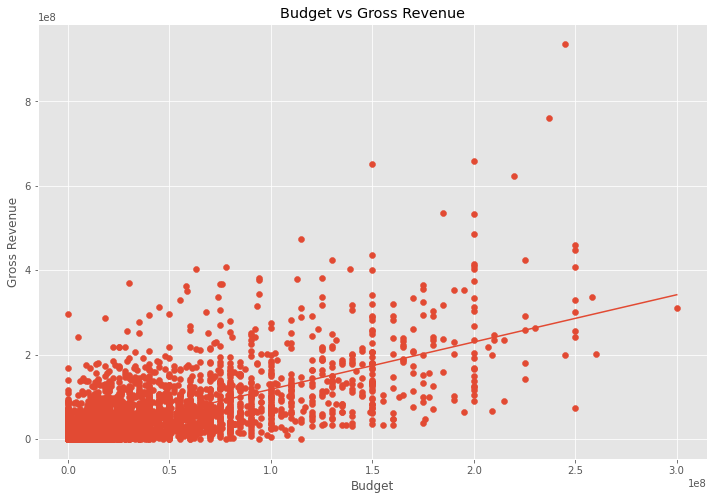

In [6]:
#finding the correlation between budget and gross 
matplotlib.rcParams["figure.figsize"] = (12,8)
plt.style.use("ggplot")
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
x = file["budget"]
y = file["gross"]
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [7]:
# we see a positive correlation between budget and gross revenue

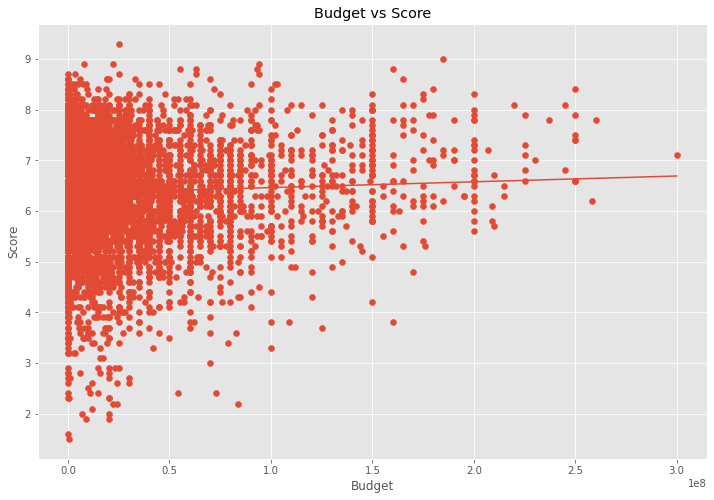

In [8]:
# finding the correlation between budget and score
matplotlib.rcParams["figure.figsize"] = (12,8)
plt.style.use("ggplot")
plt.title("Budget vs Score")
plt.xlabel("Budget")
plt.ylabel("Score")
x = file["budget"]
y = file["score"]
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [9]:
# little to no correlation between the two variables 

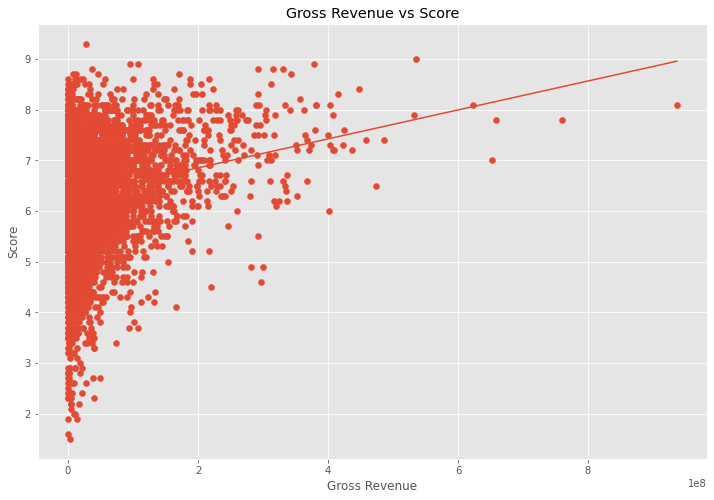

In [10]:
# finding the correlation betwen gross and score
matplotlib.rcParams["figure.figsize"] = (12,8)
plt.style.use("ggplot")
plt.title("Gross Revenue vs Score")
plt.xlabel("Gross Revenue")
plt.ylabel("Score")
x = file["gross"]
y = file["score"]
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [11]:
# we see a positive correlation between the two variables

In [12]:
# show all the corraltions between the variables using the pearson method
file.corr(method="pearson")

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


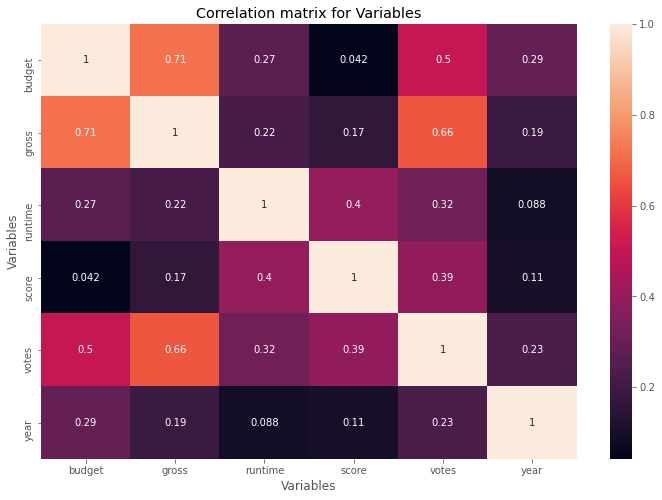

In [13]:
# show correlation matrix
matplotlib.rcParams["figure.figsize"] = (12,8)
correlation_matrix = file.corr(method="pearson")
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [14]:
# Find the top 20 earning companies by gross revenue

companies = file["company"].unique()
totals = {}
for company in companies:
    earnings = sum(file.loc[file["company"]==company]["gross"])
    totals[company] = earnings
    
totals = dict(sorted(totals.items(), key=operator.itemgetter(1),reverse=True))
count = 0
for company in totals:
    print("'{0}' earned ${1}".format(company,totals[company]))
    count += 1
    if count == 20:
        break

'Warner Bros.' earned $21322318408
'Universal Pictures' earned $19430051320
'Paramount Pictures' earned $17115702495
'Twentieth Century Fox Film Corporation' earned $14788570587
'Walt Disney Pictures' earned $10455507123
'Columbia Pictures' earned $8824216545
'New Line Cinema' earned $8540112287
'Columbia Pictures Corporation' earned $7720114061
'Touchstone Pictures' earned $6688156475
'DreamWorks' earned $5458121021
'DreamWorks Animation' earned $4143974397
'Metro-Goldwyn-Mayer (MGM)' earned $3384812932
'Pixar Animation Studios' earned $3242024778
'Fox 2000 Pictures' earned $3113861473
'TriStar Pictures' earned $2967117827
'Marvel Studios' earned $2671642781
'Lucasfilm' earned $2653975002
'Summit Entertainment' earned $2489806367
'Dimension Films' earned $2111898192
'Miramax' earned $1831170299


In [15]:
# Find the top 20 actors with the best avg rating
actors = file["star"].unique()
ratings = {}
for actor in actors:
    values = file.loc[file["star"]==actor]["score"]
    rating = sum(values)/len(values)
    ratings[actor] = rating

ratings = dict(sorted(ratings.items(), key=operator.itemgetter(1),reverse=True))
count = 0
for actor in ratings:
    print("'{0}' averaged rating of {1}".format(actor,ratings[actor]))
    count += 1
    if count == 20:
        break

'Alexandre Rodrigues' averaged rating of 8.7
'Kay Kay Menon' averaged rating of 8.6
'Luigi Lo Cascio' averaged rating of 8.5
'Ulrich M�he' averaged rating of 8.5
'Darsheel Safary' averaged rating of 8.5
'Y�ji Matsuda' averaged rating of 8.4
'Mohammad Amir Naji' averaged rating of 8.4
'Min-sik Choi' averaged rating of 8.4
'Ben Burtt' averaged rating of 8.4
'Payman Maadi' averaged rating of 8.4
'Ajay Devgn' averaged rating of 8.4
'Davor Dujmovic' averaged rating of 8.3
'Mohsen Makhmalbaf' averaged rating of 8.3
'You Ge' averaged rating of 8.3
'Ellen Burstyn' averaged rating of 8.3
'Lars Rudolph' averaged rating of 8.3
'Wen Jiang' averaged rating of 8.3
'Jason Flemyng' averaged rating of 8.2
'Hossein Mahjoub' averaged rating of 8.2
'Chieko Baish�' averaged rating of 8.2


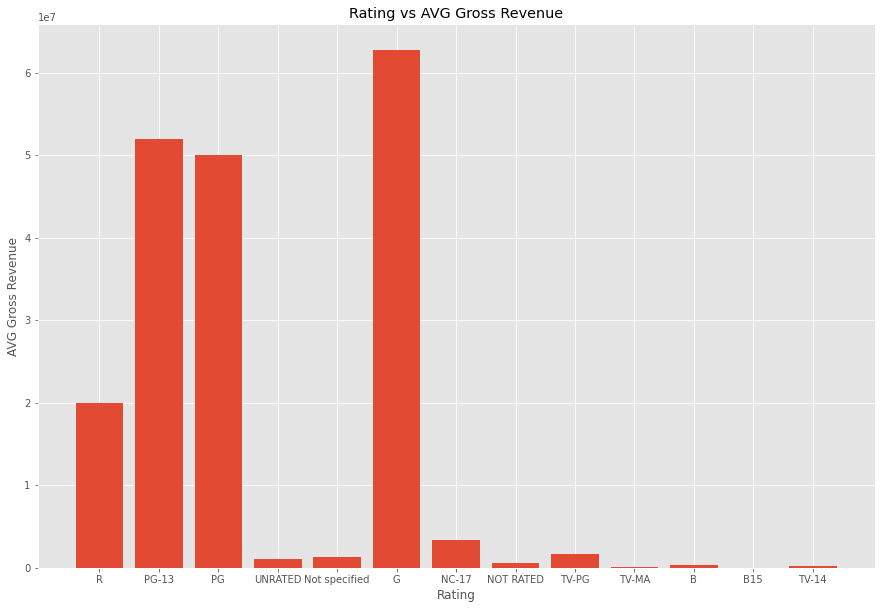

In [16]:
# average gross revenue of movie rating
ratings = file["rating"].unique()
gross = []
for rating in ratings:
    values = file.loc[file["rating"]==rating]["gross"]
    avgGross = sum(values)/len(values)
    gross.append(avgGross)
    
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.title("Rating vs AVG Gross Revenue")
plt.xlabel("Rating")
plt.ylabel("AVG Gross Revenue")
x = ratings
y = gross
plt.bar(x,y)
plt.show()

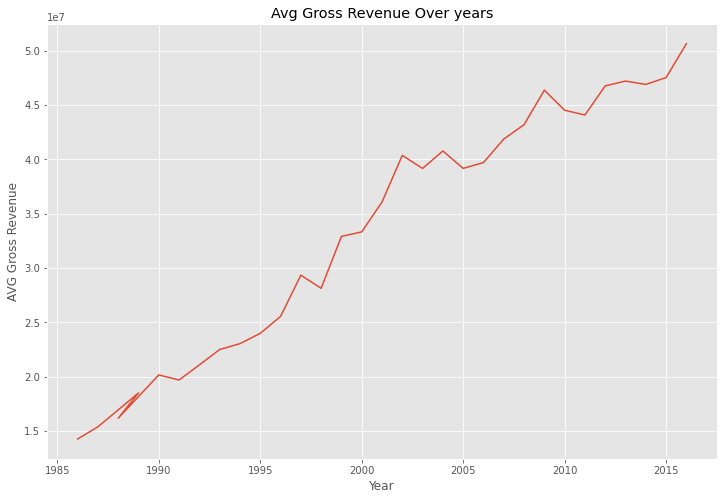

In [17]:
# avg gross revenues throughout the years

years = file["year"].unique()
avg_revenues = []
for year in years:
    revenues = file.loc[file["year"]==year]["gross"]
    avg = sum(revenues)/len(revenues)
    avg_revenues.append(avg)
    
matplotlib.rcParams["figure.figsize"] = (12,8)
plt.title("Avg Gross Revenue Over years")
plt.xlabel("Year")
plt.ylabel("AVG Gross Revenue")
x = years
y = avg_revenues
plt.plot(x,y)
plt.show()